In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [2]:
# Load files as df
data_1 = pd.read_csv('Milestone 1 Dataset/hr_temp_20170201-20200131_subset.csv')
data_2 = pd.read_csv('Milestone 1 Dataset/hrl_load_metered - 20170201-20200131.csv')

In [3]:
# Create data frame with only variables of interest
data = {'MW': data_2['mw'], 'Temp': data_1['HourlyDryBulbTemperature'], 'Date': data_1['DATE']}
data_df = pd.DataFrame(data)
data_df.head()

,MW,Temp,Date
0,1419.881,37.0,2017-02-01T00:53:00
1,1379.505,37.0,2017-02-01T01:53:00
2,1366.106,36.0,2017-02-01T02:53:00
3,1364.453,36.0,2017-02-01T03:53:00
4,1391.265,36.0,2017-02-01T04:53:00


In [4]:
# Cast as datetime
data_df['Date'] = pd.to_datetime(data_df['Date'])   

In [5]:
# Create time variables out of the 'Date' variable
data_df['hour'] = [x.hour for x in data_df['Date']]  #hour
data_df['dow'] =  [x.weekday() for x in data_df['Date']] #day of week
data_df['month'] =  [x.month for x in data_df['Date']] #month 
data_df['year'] = [x.year for x in data_df['Date']] #year

In [6]:
# Set 'Date' as index
data_df.set_index('Date', inplace=True)

In [7]:
# Fill in missing values in the 'Temp' variable by linear interpolation
data_df.interpolate(method='linear', inplace=True)
sum(data_df['Temp'].isnull())

0

In [8]:
# Divide data into training (until 12-31-2019) and testing (since January, 2020)
training = data_df[:'12-31-2019']
testing = data_df['01-01-2020':]

In [9]:
training.head()

,MW,Temp,hour,dow,month,year
Date,,,,,,
2017-02-01 00:53:00,1419.881,37.0,0,2,2,2017
2017-02-01 01:53:00,1379.505,37.0,1,2,2,2017
2017-02-01 02:53:00,1366.106,36.0,2,2,2,2017
2017-02-01 03:53:00,1364.453,36.0,3,2,2,2017
2017-02-01 04:53:00,1391.265,36.0,4,2,2,2017


In [10]:
testing.head()

,MW,Temp,hour,dow,month,year
Date,,,,,,
2020-01-01 00:53:00,1363.428,31.0,0,2,1,2020
2020-01-01 01:53:00,1335.975,29.0,1,2,1,2020
2020-01-01 02:53:00,1296.817,30.0,2,2,1,2020
2020-01-01 03:53:00,1288.403,30.0,3,2,1,2020
2020-01-01 04:53:00,1292.263,31.0,4,2,1,2020


Text(0, 0.5, 'MW')

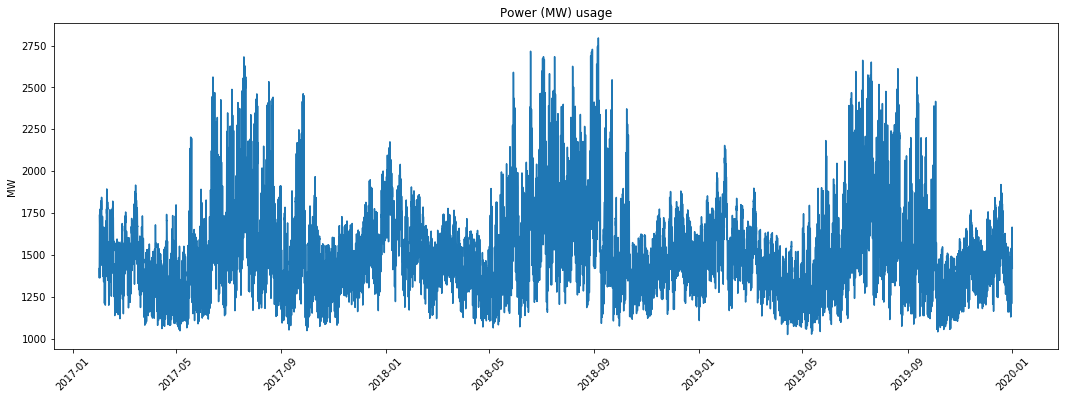

In [11]:
# Plot training energy data
plt.figure(figsize=(18,6))
plt.plot(training.index, training.MW)
plt.xticks(rotation = 45)
plt.title('Power (MW) usage')
plt.ylabel('MW')

- The highest amount of energy is consumed from May to September. 
- In January there is a second peek in energy consumption. 

Text(0, 0.5, 'MW')

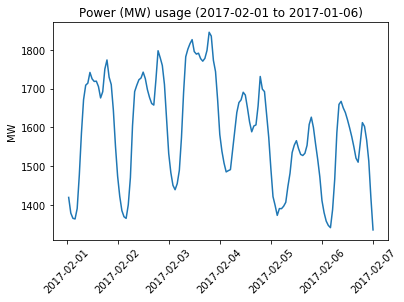

In [12]:
# Plot training energy data (one week only) 
plt.plot(training[:'2017-02-06'].index, training.MW[:'2017-02-06'])
plt.xticks(rotation = 45)
plt.title('Power (MW) usage (2017-02-01 to 2017-01-06)')
plt.ylabel('MW')

- Each day seem to show a single cycle with two peaks. 
- There is an upward tendency in the first three days.
- Then, it moves downwards the next two day (possibly weekends). 
- And the last day the tendency move back up again. 

Text(0, 0.5, 'Temperature')

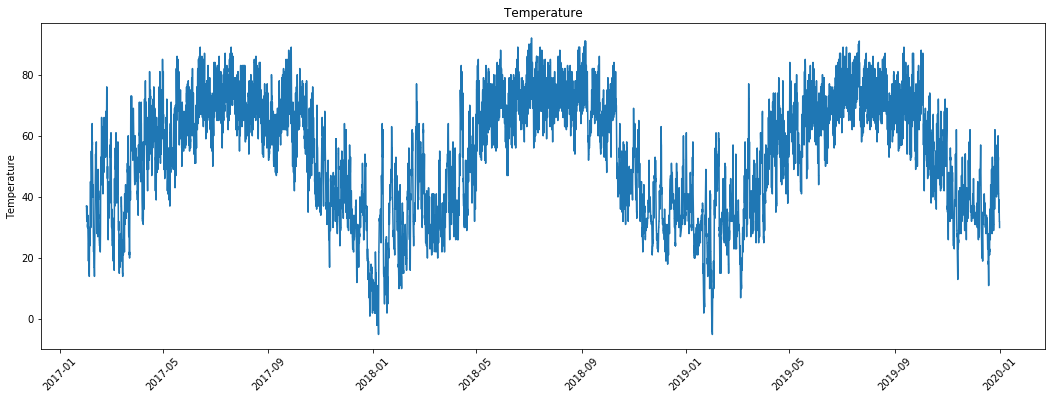

In [13]:
# Plot temperature data
plt.figure(figsize=(18,6))
plt.plot(training.index, training.Temp)
plt.xticks(rotation = 45)
plt.title('Temperature')
plt.ylabel('Temperature')

- Temperature is at its lowest point in January. 
- Then, temperature increases reaching its highest point in June - July.
- Then, temperature decreases until January. 

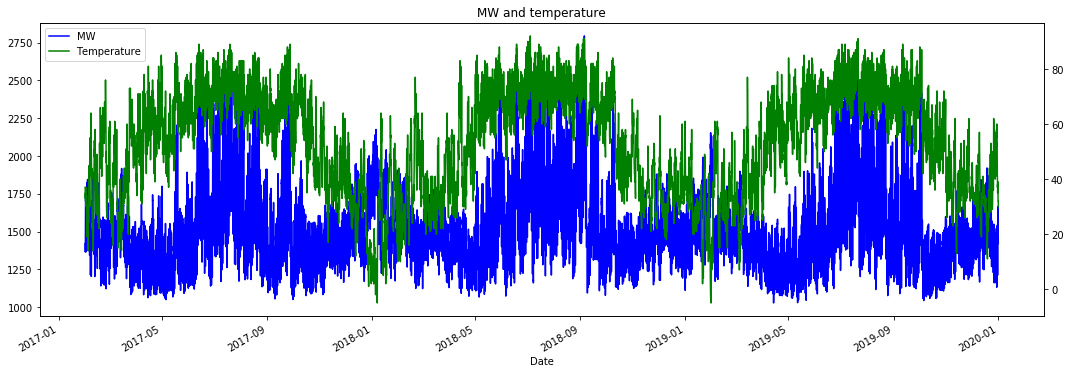

In [14]:
# Plot both power and temperature
plt.figure(figsize=(18,6))
ax1 = training['MW'].plot(color = 'blue', label='MW')
ax2 = ax1.twinx()
ax2 = training['Temp'].plot(color = 'green', label='Temperature')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1+h2, l1+l2, loc=2)
plt.title('MW and temperature')
plt.show()

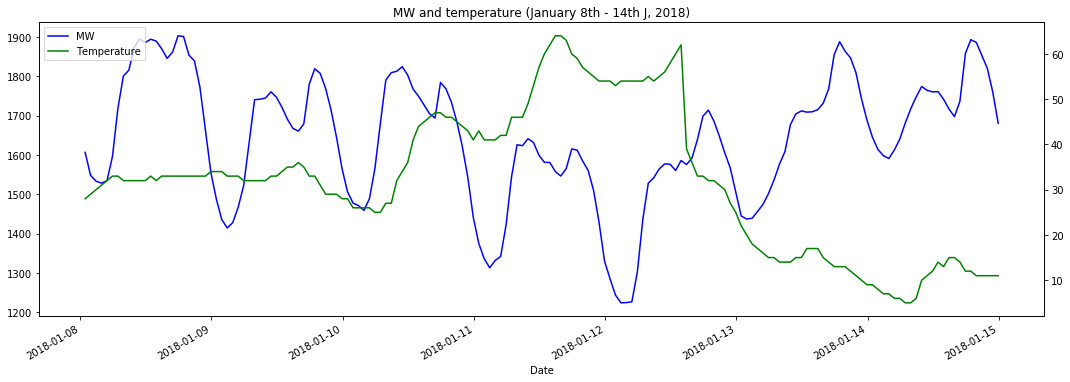

In [15]:
# Plot one week of energy and temperature data (January)
plt.figure(figsize=(18,6))
ax1 = training['2018-01-08':'2018-01-14']['MW'].plot(color = 'blue', label='MW')
ax2 = ax1.twinx()
ax2 = training['2018-01-08':'2018-01-14']['Temp'].plot(color = 'green', label='Temperature')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1+h2, l1+l2, loc=2)
plt.title('MW and temperature (January 8th - 14th J, 2018)')
plt.show()

- Here in January, there is no clear pattern between temperature and energy. 

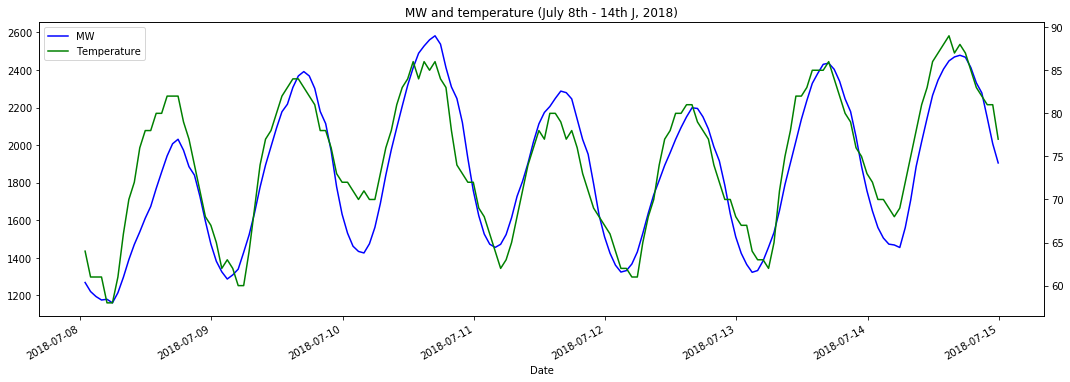

In [16]:
# Plot one week of energy and temperature data (July)
plt.figure(figsize=(18,6))
ax1 = training['2018-07-08':'2018-07-14']['MW'].plot(color = 'blue', label='MW')
ax2 = ax1.twinx()
ax2 = training['2018-07-08':'2018-07-14']['Temp'].plot(color = 'green', label='Temperature')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1+h2, l1+l2, loc=2)
plt.title('MW and temperature (July 8th - 14th J, 2018)')
plt.show()

- Here in July, the energy used and the temperature seem to be highly correlated through the week period. 

In [17]:
# Calculate correlation between energy and temperature variables
corr_p, _ = pearsonr(training.MW, training.Temp)
corr_s, _ = spearmanr(training.MW, training.Temp)
print("Pearson's correlation: {}; Spearman's correlation: {}".format(corr_p, corr_s))

Pearson's correlation: 0.3275395569074121; Spearman's correlation: 0.31031864242384893


Text(0.5, 1.0, 'MW by Temperature')

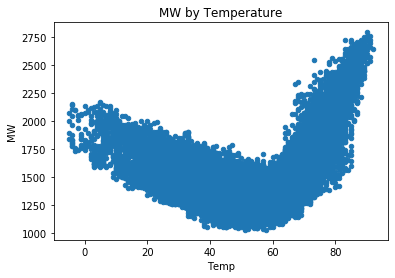

In [19]:
# Scatter plot of training energy and temperature data
data_df.plot.scatter('Temp', 'MW')
plt.title('MW by Temperature')

- Here, it seems that when the temperature ranges from approximately 30 to 70 degrees, the energy consumtion reaches an upper limit of 1500 MW. When the temperature moves up or down from this range, energy consumption increases. 
- Notice that energy consumption is higher with higher temperatures, though. 